In [14]:
import pandas as pd

In [15]:
lawinen_set = pd.read_csv('newData/gesamt_set.csv', sep=',')

In [16]:
lawinen_set['ID'] = lawinen_set['ID'].fillna(0)
lawinen_set

,Datum,Intervall,Lawinengrad,Schneehöhe,Schneehöhe_Norm,Niederschlag,Lufttemperatur_7h,Lufttemperatur_7h_Norm,Lufttemperatur_7h_Gew,Lufttemperatur_14h,...,Lawinen_Art,Volumen,ID,meanExpo,meanSlope,stdDevSlope,MinSlope,MaxSlope,Altitude,Avalanche
0,1989-01-02 00:00:00,1988/ 1989,0.0,106.0,131.984436,0.0,-6.7,-53.6,-12.0,-2.8,...,NaN,NaN,0.0,297.472206,45.023540,5.966720,37.168340,62.701240,1940.334000,0
1,1989-01-03 00:00:00,1988/ 1989,0.0,106.0,127.903469,0.0,-1.7,-13.6,-26.8,1.2,...,NaN,NaN,0.0,297.472206,45.023540,5.966720,37.168340,62.701240,1940.334000,0
2,1989-01-04 00:00:00,1988/ 1989,0.0,106.0,124.797645,0.0,-3.9,-31.2,-6.8,1.3,...,NaN,NaN,0.0,55.325029,38.311700,2.672600,30.375400,45.472500,2042.248400,0
3,1989-01-05 00:00:00,1988/ 1989,0.0,106.0,126.709003,0.1,-5.7,-45.6,-15.6,-5.1,...,NaN,NaN,0.0,296.268658,39.920758,7.472500,6.785733,63.766642,2443.633433,0
4,1989-01-06 00:00:00,1988/ 1989,0.0,106.0,128.484848,12.7,-6.0,-48.0,-22.8,-2.0,...,NaN,NaN,0.0,291.038533,44.495709,5.800336,15.979145,61.018300,2256.943155,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Schneebrettlawine trocken,mittel,20.0,271.664767,41.924600,4.659500,33.076000,54.920900,1980.761100,1
7186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lockerschnee- und Schneebrettlawinen trocken,mittel,32.0,291.038533,44.495709,5.800336,15.979145,61.018300,2256.943155,1
7187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lockerschneelawine naß,gross,2.0,264.471932,43.070671,8.680311,9.192779,69.469879,2887.147429,1
7188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Schneebrettlawine naß,mittel,8.0,260.468688,42.659900,7.696246,7.606200,65.809534,3022.772909,1


<AxesSubplot:>

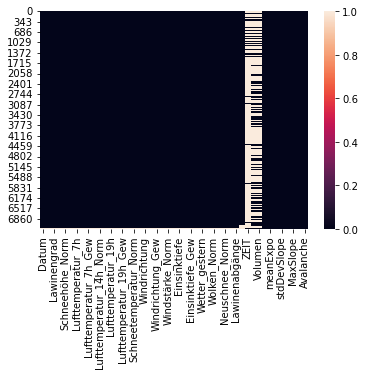

In [17]:
import seaborn as sns

sns.heatmap(lawinen_set.isna())

In [18]:
from sklearn import tree

lawinen_set = lawinen_set.drop(['Datum', 'Intervall', 'ZEIT', ], axis=1)

lawinen_set['Lawinen_Art'] = pd.factorize(lawinen_set['Lawinen_Art'])[0]
lawinen_set['Volumen'] = pd.factorize(lawinen_set['Volumen'])[0]
lawinen_set['Distanz'] = lawinen_set['Distanz'].fillna(0)
lawinen_set.dropna(inplace=True)
lawinen_set

,Lawinengrad,Schneehöhe,Schneehöhe_Norm,Niederschlag,Lufttemperatur_7h,Lufttemperatur_7h_Norm,Lufttemperatur_7h_Gew,Lufttemperatur_14h,Lufttemperatur_14h_Norm,Lufttemperatur_14h_Gew,...,Lawinen_Art,Volumen,ID,meanExpo,meanSlope,stdDevSlope,MinSlope,MaxSlope,Altitude,Avalanche
0,0.0,106.0,131.984436,0.0,-6.7,-53.6,-12.0,-2.8,-22.4,-2.4,...,-1,-1,0.0,297.472206,45.023540,5.966720,37.168340,62.701240,1940.334000,0
1,0.0,106.0,127.903469,0.0,-1.7,-13.6,-26.8,1.2,9.6,-11.2,...,-1,-1,0.0,297.472206,45.023540,5.966720,37.168340,62.701240,1940.334000,0
2,0.0,106.0,124.797645,0.0,-3.9,-31.2,-6.8,1.3,10.4,4.8,...,-1,-1,0.0,55.325029,38.311700,2.672600,30.375400,45.472500,2042.248400,0
3,0.0,106.0,126.709003,0.1,-5.7,-45.6,-15.6,-5.1,-40.8,5.2,...,-1,-1,0.0,296.268658,39.920758,7.472500,6.785733,63.766642,2443.633433,0
4,0.0,106.0,128.484848,12.7,-6.0,-48.0,-22.8,-2.0,-16.0,-20.4,...,-1,-1,0.0,291.038533,44.495709,5.800336,15.979145,61.018300,2256.943155,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7151,33.0,175.0,162.359178,16.0,-9.0,-72.0,-36.0,-1.0,-8.0,-40.0,...,0,2,33.0,62.004911,41.474100,8.876500,1.418093,65.950220,2223.063053,1
7152,33.0,155.0,141.483293,8.0,4.0,32.0,-36.0,8.0,64.0,-4.0,...,-1,-1,0.0,267.169200,43.175288,6.860250,11.513050,65.976500,2978.152008,0
7153,33.0,149.0,134.537246,0.0,-1.0,-8.0,16.0,1.0,8.0,32.0,...,-1,-1,0.0,313.357661,41.103233,5.384600,31.226150,54.985633,2040.638533,0
7154,22.0,144.0,129.792371,0.0,-2.0,-16.0,-4.0,-6.0,-48.0,4.0,...,-1,-1,0.0,55.325029,38.311700,2.672600,30.375400,45.472500,2042.248400,0


<AxesSubplot:>

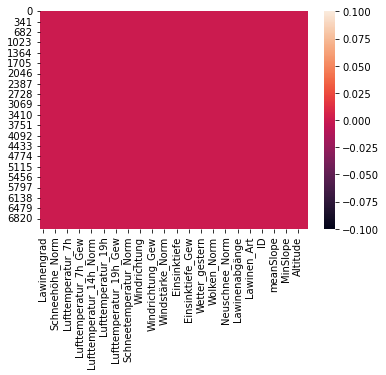

In [19]:
sns.heatmap(lawinen_set.isna())

In [20]:
#sns.pairplot(lawinen_set, hue="Avalanche",palette="bright")

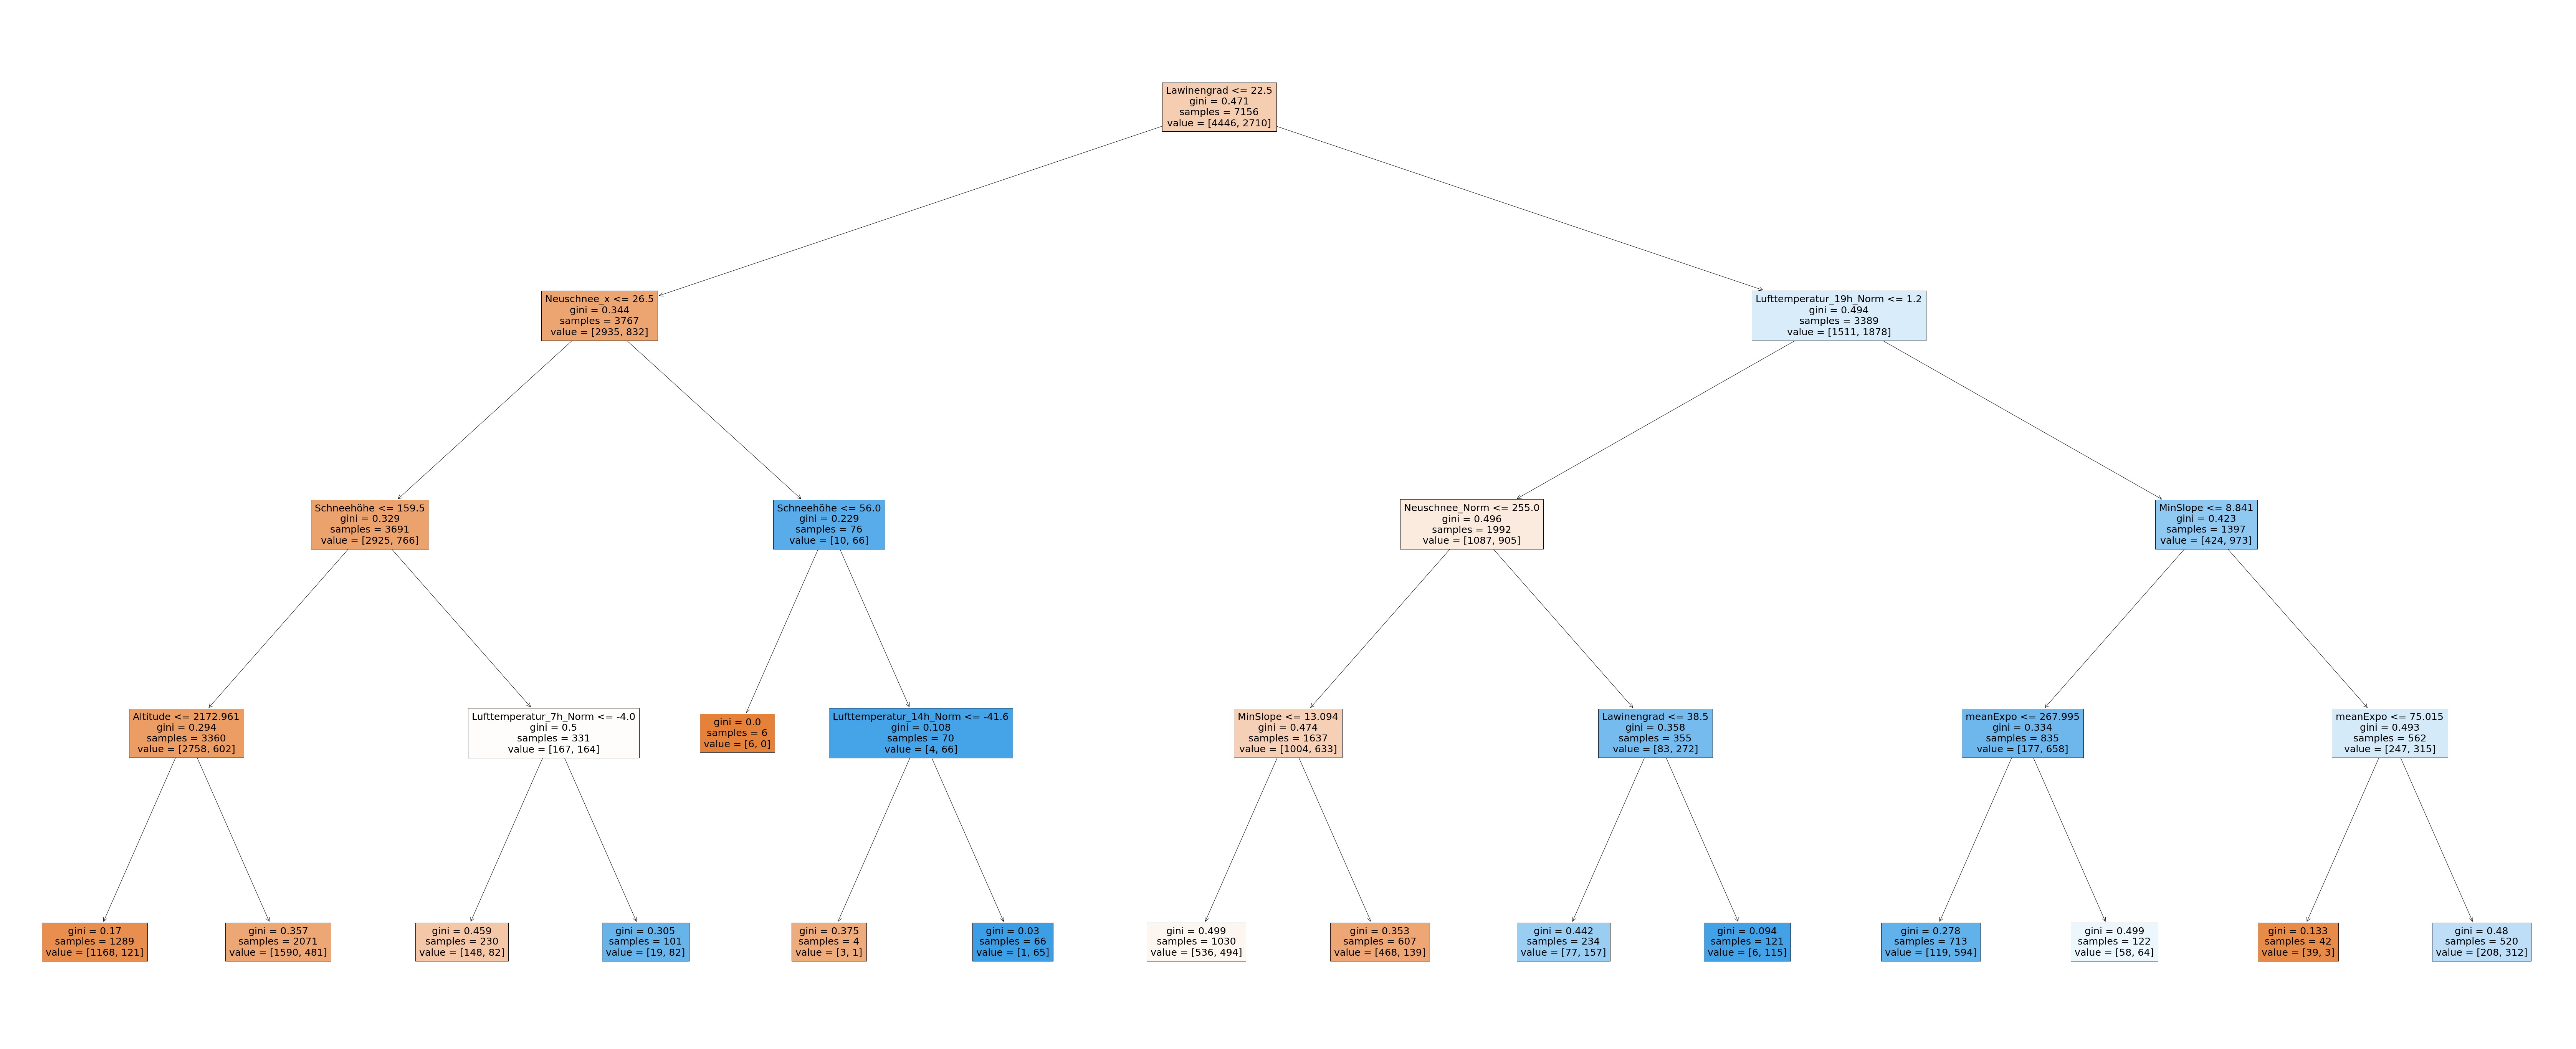

In [21]:
import copy
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

avalanche_set = copy.copy(lawinen_set)

avalanche_set = avalanche_set.drop([ 'Lawinenabgänge', 'ID', 'Volumen', 'Lawinen_Art',], axis=1)
feature_names = avalanche_set.columns.drop('Avalanche')
X = avalanche_set[avalanche_set.columns.drop('Avalanche')]
y = avalanche_set['Avalanche']
dt = tree.DecisionTreeClassifier( max_depth=4)
dt.fit(X, y)


fig, ax = plt.subplots(figsize=(120, 50))
tree.plot_tree(dt, filled=True, ax=ax, feature_names=feature_names)
plt.show()

In [22]:
cross_val_score(dt, X, y, cv=5)

array([0.72625698, 0.74493361, 0.71069182, 0.68972746, 0.70300489])

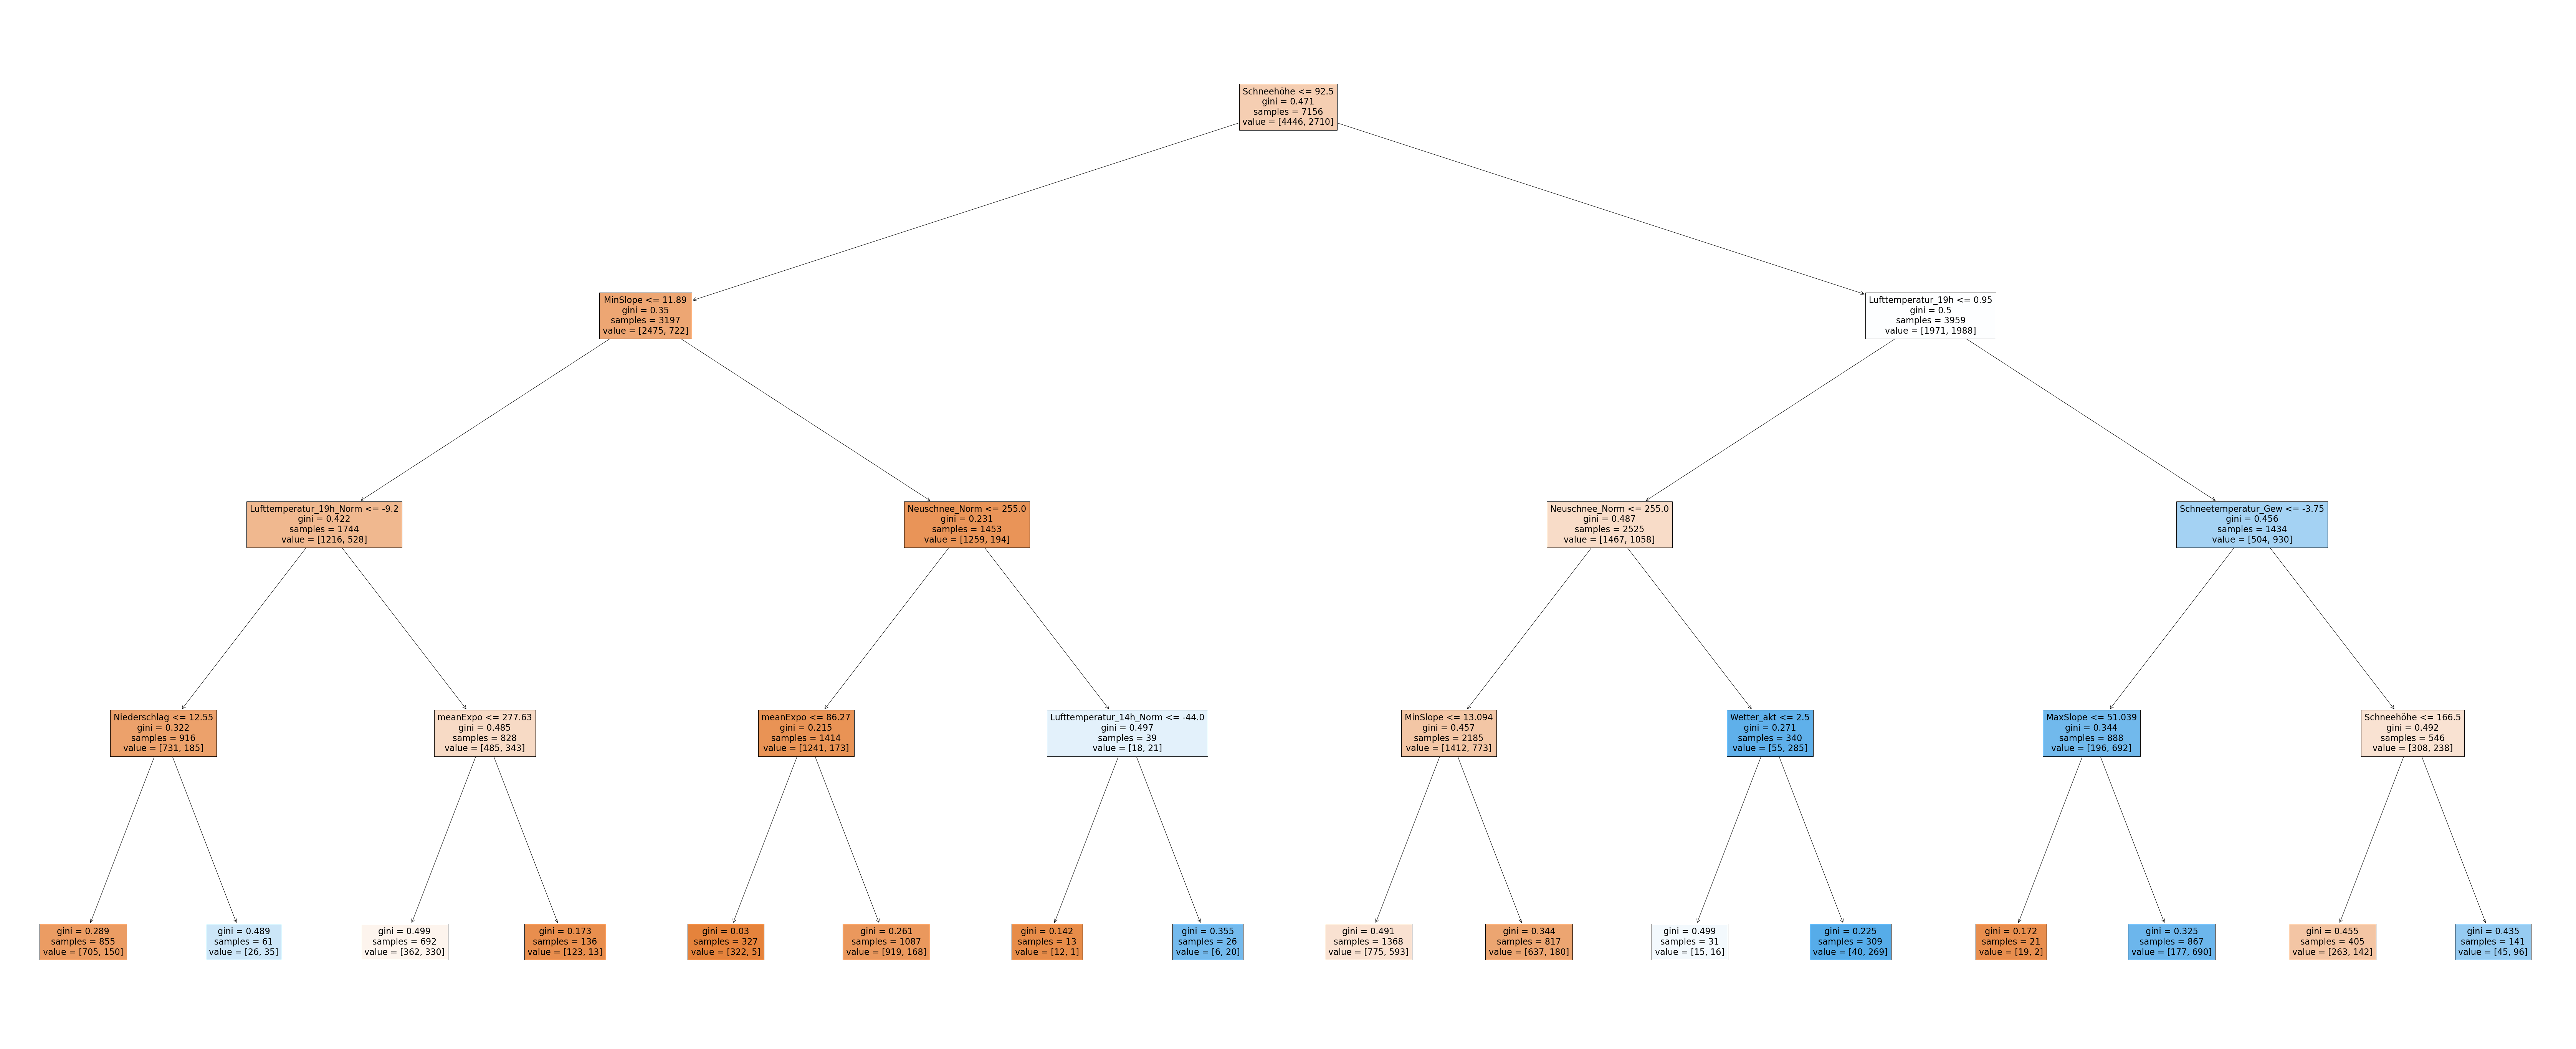

In [23]:
avalanche_set_noLawinengrad = avalanche_set.drop(['Lawinengrad',], axis=1)
feature_names = avalanche_set_noLawinengrad.columns.drop('Avalanche')
X_noLawinengrad = avalanche_set_noLawinengrad[avalanche_set_noLawinengrad.columns.drop('Avalanche')]
y_noLawinengrad = avalanche_set_noLawinengrad['Avalanche']
dt = tree.DecisionTreeClassifier( max_depth=4)
dt.fit(X_noLawinengrad, y_noLawinengrad)


fig, ax = plt.subplots(figsize=(120, 50))
tree.plot_tree(dt, filled=True, ax=ax, feature_names=feature_names)
plt.show()

In [24]:
cross_val_score(dt, X_noLawinengrad, y_noLawinengrad, cv=5)

array([0.66480447, 0.73934312, 0.61705101, 0.70510133, 0.71208945])

In [25]:
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train , X_test , y_train, y_test = train_test_split(X, y, random_state=0)

clf = make_pipeline(StandardScaler(), svm.SVC())
#clf = svm.SVC()
clf.fit(X_train,y_train)

#gram_test = np.dot(X_test, X_train.T)
pred = clf.predict(X_test)

print(accuracy_score(y_test, pred), cross_val_score(clf, X, y, cv=5))

0.7887087758524315 [0.73393855 0.74353599 0.71069182 0.7498253  0.75960867]


In [26]:

X_train , X_test , y_train, y_test = train_test_split(X_noLawinengrad, y_noLawinengrad, random_state=0)

clf = make_pipeline(StandardScaler(), svm.SVC())
#clf = svm.SVC()
clf.fit(X_train,y_train)

#gram_test = np.dot(X_test, X_train.T)
pred = clf.predict(X_test)

print(accuracy_score(y_test, pred), cross_val_score(clf, X, y, cv=5))

0.7853549468977082 [0.73393855 0.74353599 0.71069182 0.7498253  0.75960867]
